In [1]:
#FIUBA - 75.26 Simulacion
#2C 2019 - Trabajo final
#79979 - Gonzalez, Juan Manuel (juanmg0511@gmail.com)

#A pseudo-random numbers generator based on a novel 3D chaotic map with an application to color image encryption
#https://doi.org/10.1007/s11071-018-4390-z
#3D piecewise-logistic map
#3D-PLM
#Test espectral

# Import libraries 
import math
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d 

#Definición de parámetros de control: c1, c2, reales
#Como define el paper, c1=c2=20
c1 = 20
c2 = 20

#Implementación de funciones auxiliares
#Picewise map
def pMap(x):
    "piecewise map: funcion que dado x y un parametro de control real c1, calcula Ψ(x)"
    return (abs(1 - (c1 * x)))

#Logistic map
def lMap(x, y):
    "2D logistic map: funcion que dados x e y, y un parametro de control real c2, calcula Λ(x, y)"
    return (c2 * x * (1 - y))

#Implemantación del 3D piecewise-logistic map (3D-PLM), T
def tMap(x, y, z):
    "3D piecewise-logistic map: funcion que dados x, y, z, los paráetros de control reales c1 y c2, calcula T(x, y, z)"    
    x = (pMap(x) + lMap(y, z)) % 1
    y = (pMap(y) + lMap(z, x)) % 1
    z = (pMap(z) + lMap(x, y)) % 1
    
    return x, y, z

#Función de discretización Φ
def phi(amin, amax, d, u):
    "Función de discretización Φ:"
    "Φd : [amin, amax] -> [0, ... , d] ; para amin=0 y amax=1"
    "Dados amin, amax y d, calcula: u -> Φd(u)"
    
    h = ((abs(amax-amin))/(d+1))
    
    r = 0
    if (u >= amin and u < amax):   
        r = math.floor((u-amin)/h)    
    else:
        r = d

    return (r)

In [2]:
#Generación de las primeras 10^5 coordenadas de la secuencia
#Valores iniciales 
#Datos tomados de la Fig. 5 del paper
x0 = 0.411
y0 = 0.321
z0 = 0.631

it = 10**5

secuencia = []
for i in range(it):
    
    if i == 0:
        secuencia.append(tMap(x0, y0, z0))
    else:
        secuencia.append(tMap(secuencia[i-1][0], secuencia[i-1][1], secuencia[i-1][2]))


x = [x[0] for x in secuencia]
y = [y[1] for y in secuencia]
z = [z[2] for z in secuencia]

x2 = []
y2 = []
z2 = []

for i in range(it):
    x2.append(phi(0, 1, 255, x[i]))
    y2.append(phi(0, 1, 255, y[i]))
    z2.append(phi(0, 1, 255, z[i]))

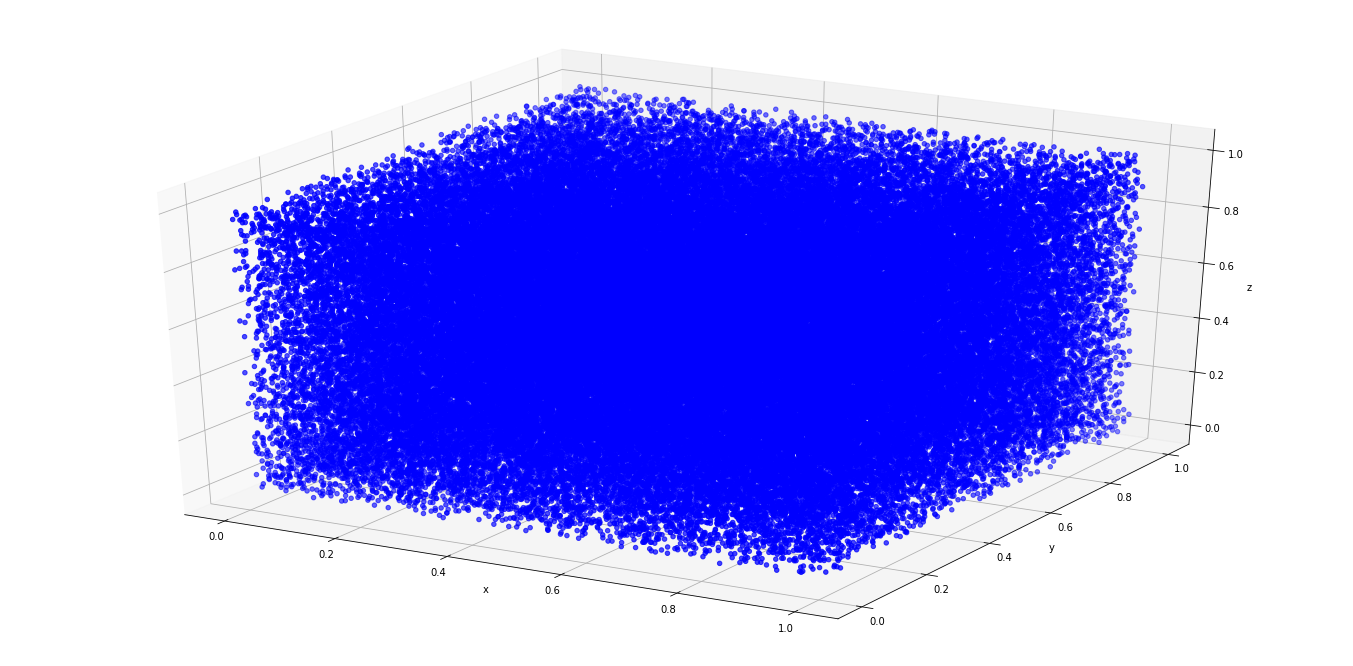

In [3]:
#Graficamos el resultado
#Valores reales
fig = plt.figure(figsize = (24, 12)) 

ax = plt.axes(projection = "3d") 
ax.scatter3D(x, y, z, color = "blue"); 
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
  
plt.show() 

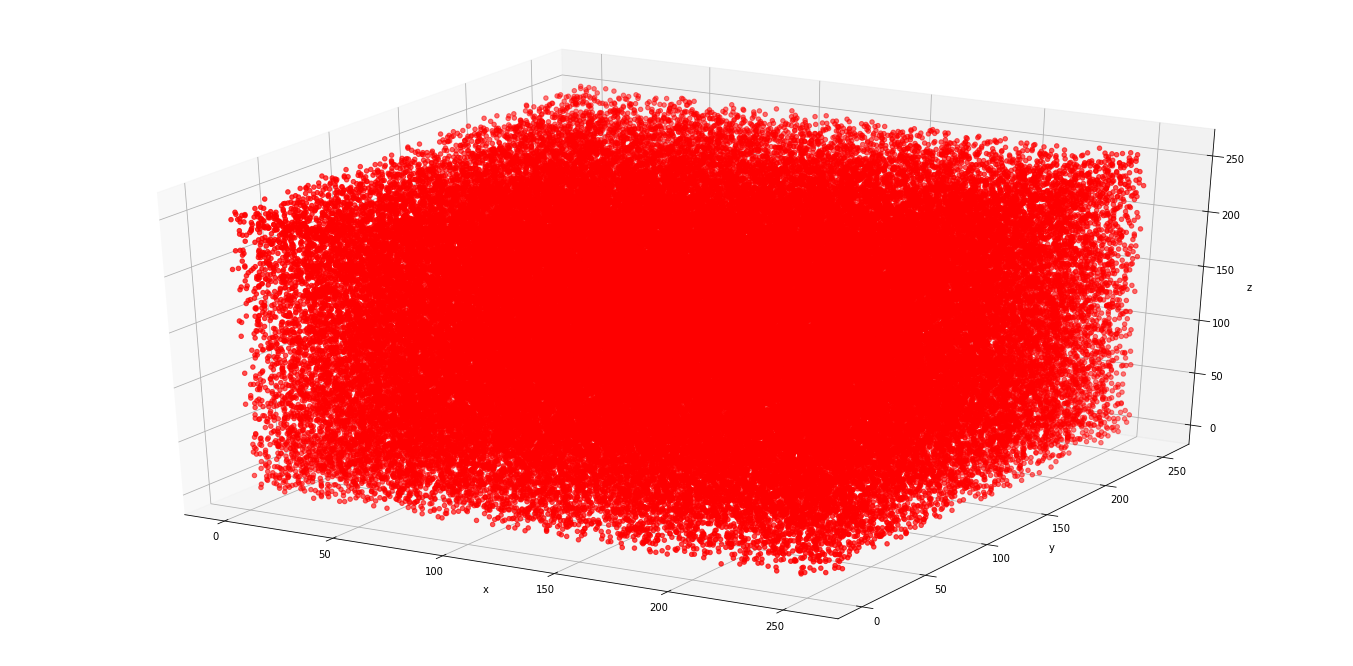

In [4]:
#Graficamos el resultado
#Discretizando el espacio de fases
fig = plt.figure(figsize = (24, 12)) 

ax = plt.axes(projection = "3d") 
ax.scatter3D(x2, y2, z2, color = "red");   
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()